In [1]:
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklift.metrics import qini_auc_score, uplift_auc_score
from sklift.viz import plot_uplift_curve, plot_qini_curve, plot_treatment_balance_curve, plot_uplift_by_percentile

import warnings
warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
pred_csv_file  = "prediction.json"
data_json_file = "./dataset/dataset_6_1_168/dataset.json"

with open(data_json_file, "r") as file_data:
    json_data = json.load(file_data)

df_pred = pd.read_csv(pred_csv_file)
df_data = pd.DataFrame(json_data)

In [3]:
df_pred.head()

,Unnamed: 0,file_name,prob,uplift
0,131072,logs_2195_2021-12-19_dbbe59a81bcd0aceb550eacce...,0.010974,0.021896
1,131073,logs_2195_2021-12-19_7dc93db6d4e4634cfc6900350...,0.034133,0.055480
2,6,logs_2097_2021-12-09_2508d38195ba8ab132c1fbb95...,0.623222,0.240372
3,9,logs_2097_2021-12-09_7f393d3dfbe6a4aa23aa804f1...,0.416572,0.298603
4,131081,logs_2195_2021-12-19_78591ee92c55b8a7dc9f7f126...,0.966517,0.032571


In [4]:
df_result = pd.merge(df_data, df_pred, how="inner", on="file_name")

In [5]:
df_result.head()

,file_name,t,y,Unnamed: 0,prob,uplift
0,logs_2097_2021-12-09_2508d38195ba8ab132c1fbb95...,0,0,6,0.623222,0.240372
1,logs_2097_2021-12-09_7f393d3dfbe6a4aa23aa804f1...,0,1,9,0.416572,0.298603
2,logs_2097_2021-12-09_0737cebfcd996eb28907c2f5d...,0,0,13,0.005037,0.010232
3,logs_2097_2021-12-09_b550c8aac2221e2aab5939a1e...,0,0,16,0.764468,0.065047
4,logs_2097_2021-12-09_5373e66507adefda0d6042d23...,0,1,19,0.862550,0.134279


In [6]:
cutoff = 0.2

y_true = df_result["y"]
y_pred = np.where(df_result["prob"] > cutoff, 1, 0)

print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
print(f"f1 score: {f1_score(y_true, y_pred)}")
print(f"Weighted f1 score: {f1_score(y_true, y_pred, average='weighted')}")

Accuracy: 0.7942420557288637
f1 score: 0.20703005603667854
Weighted f1 score: 0.8621972819034275


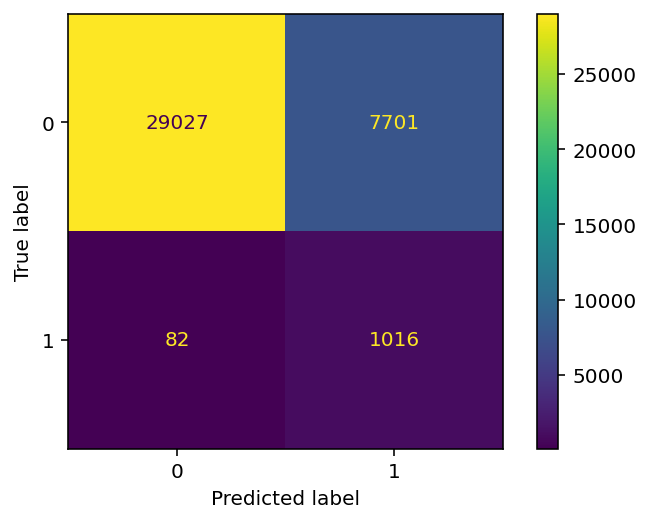

In [7]:
ConfusionMatrixDisplay.from_predictions(y_true, y_pred) 
plt.show()

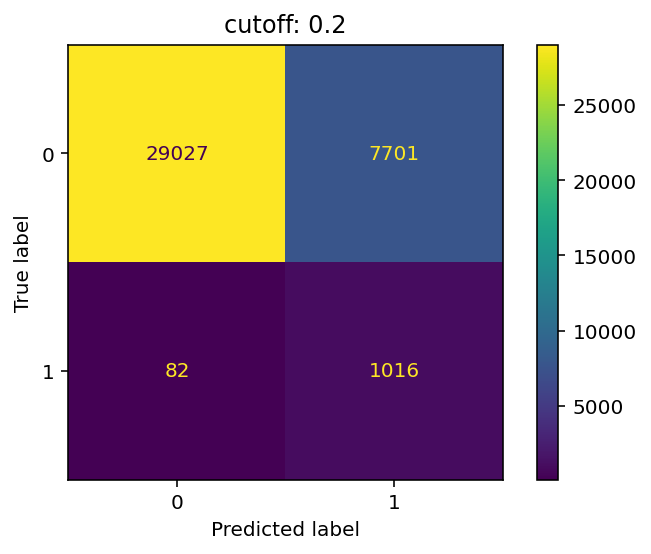

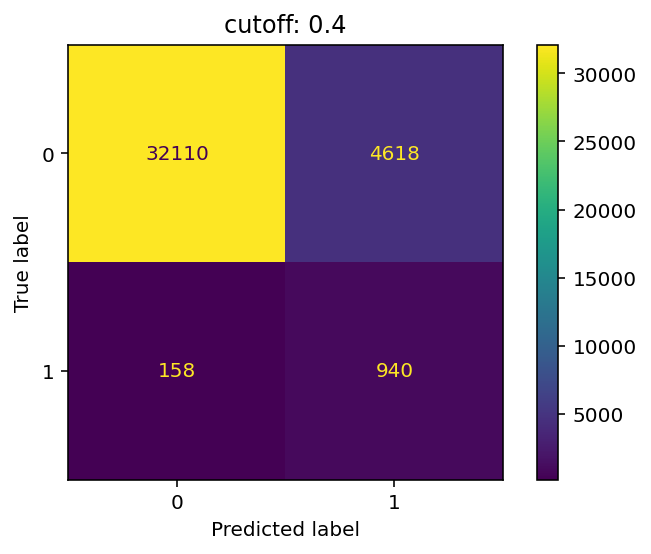

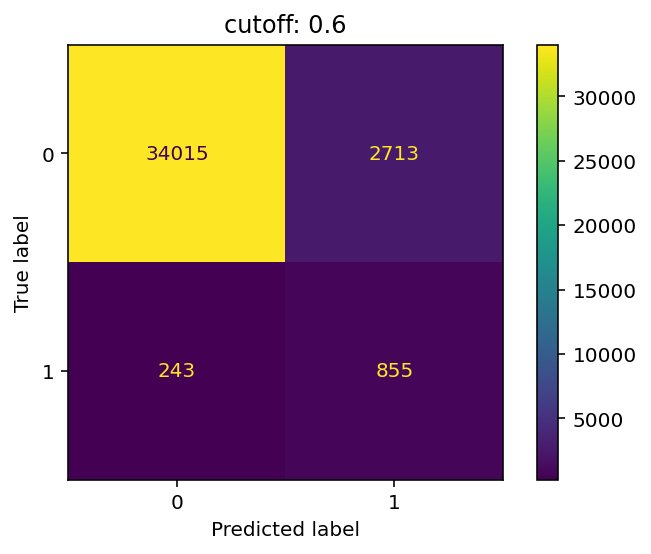

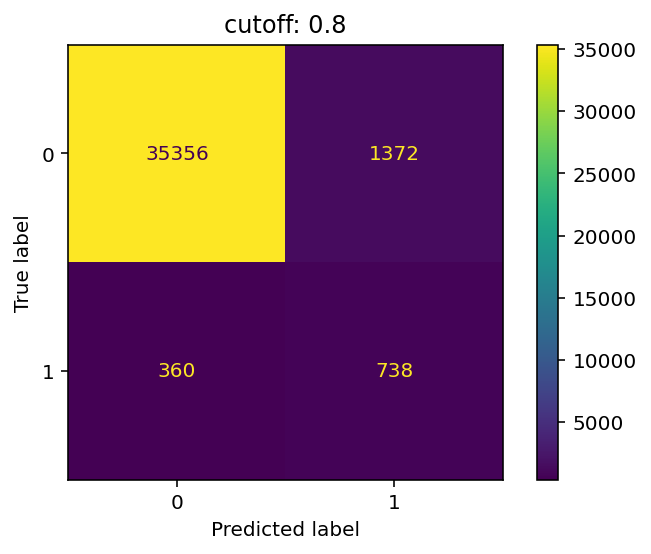

In [8]:
cutoffs = [0.2, 0.4, 0.6, 0.8]
y_true = df_result["y"]

for idx, cutoff in enumerate(cutoffs):
    y_pred = np.where(df_result["prob"] > cutoff, 1, 0)
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred) 
    plt.title(f"cutoff: {cutoff}")

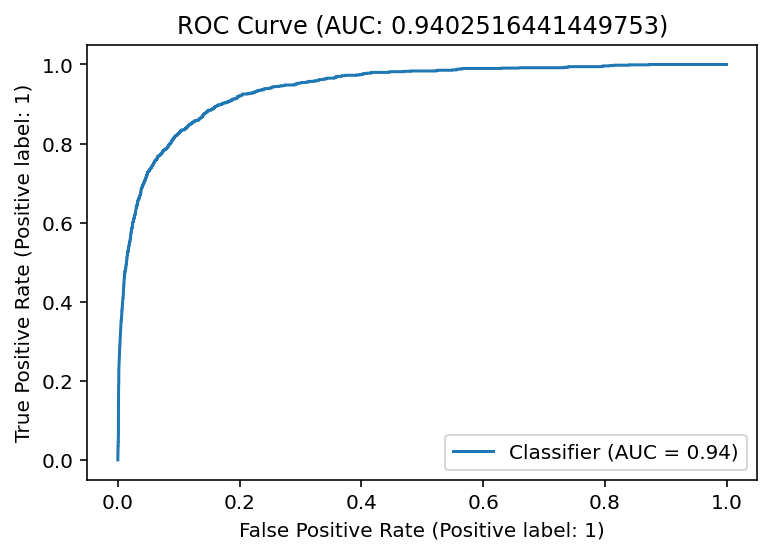

In [9]:
y_true = df_result["y"]
y_pred = df_result["prob"]

RocCurveDisplay.from_predictions(y_true, y_pred)
plt.title(f"ROC Curve (AUC: {roc_auc_score(y_true, y_pred)})")
plt.show()

In [10]:
uplift = df_result["uplift"]
treatment = df_result["t"]
y_true = df_result["y"]

print(f"Uplift AUC: {uplift_auc_score(y_true, uplift, treatment)}, Qini AUC: {qini_auc_score(y_true, uplift, treatment)}")

Uplift AUC: 0.03614098701461696, Qini AUC: 0.3026196328595025


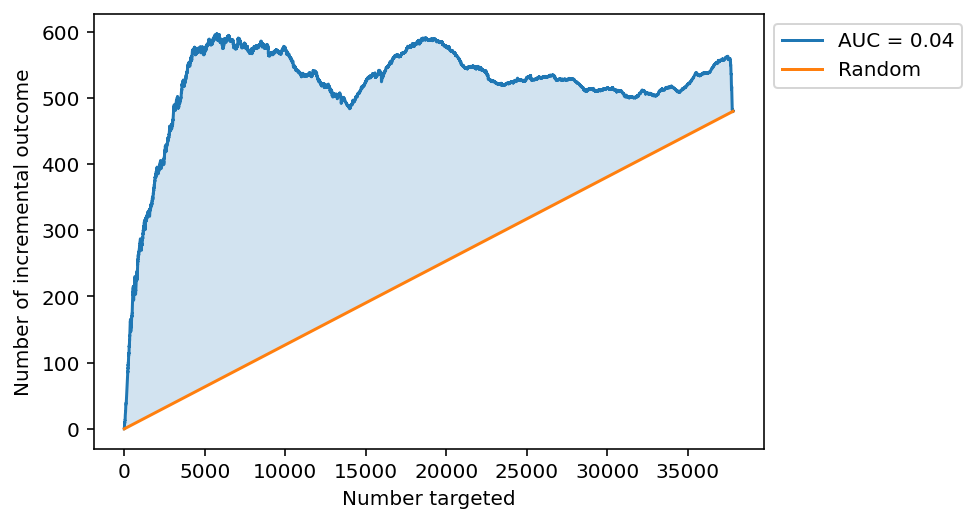

In [11]:
uplift = df_result["uplift"]
treatment = df_result["t"]
y_true = df_result["y"]

plot_uplift_curve(y_true, uplift, treatment, perfect=False)
plt.show()

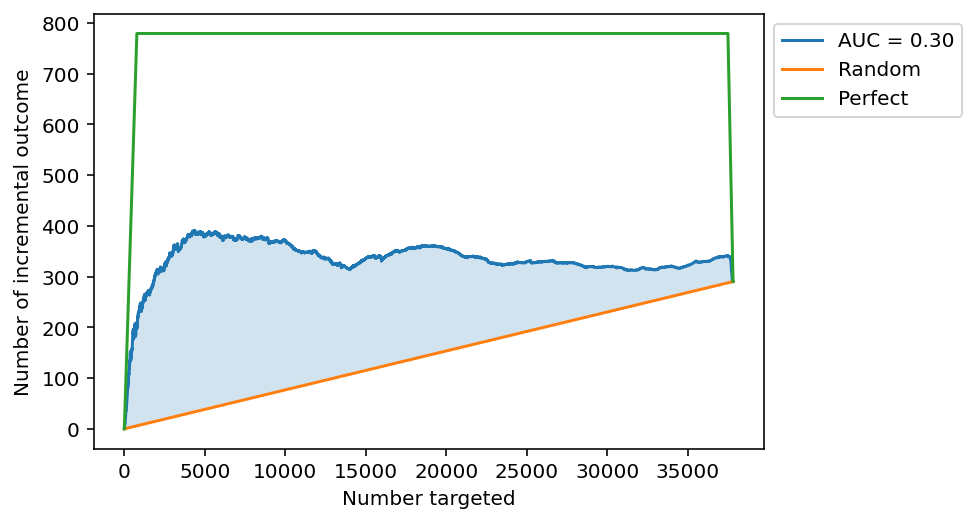

In [12]:
uplift = df_result["uplift"]
treatment = df_result["t"]
y_true = df_result["y"]

plot_qini_curve(y_true, uplift, treatment, perfect=True)
plt.show()

Propensity score: 0.6051128853169777


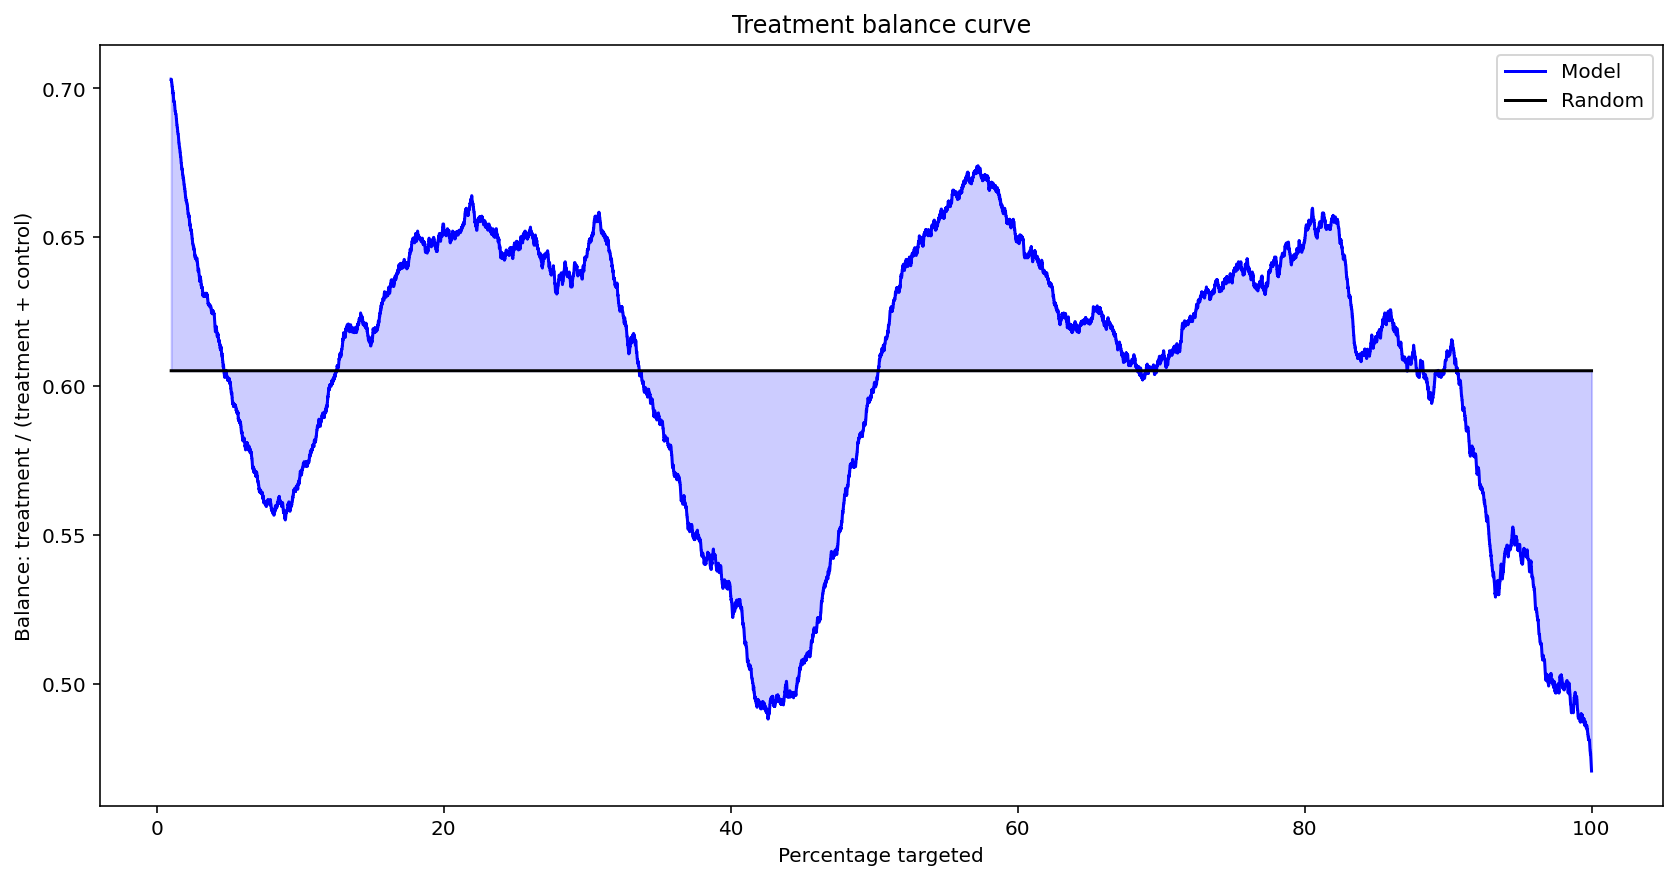

In [13]:
print(f"Propensity score: {treatment.mean()}")

plot_treatment_balance_curve(uplift, treatment)
plt.show()

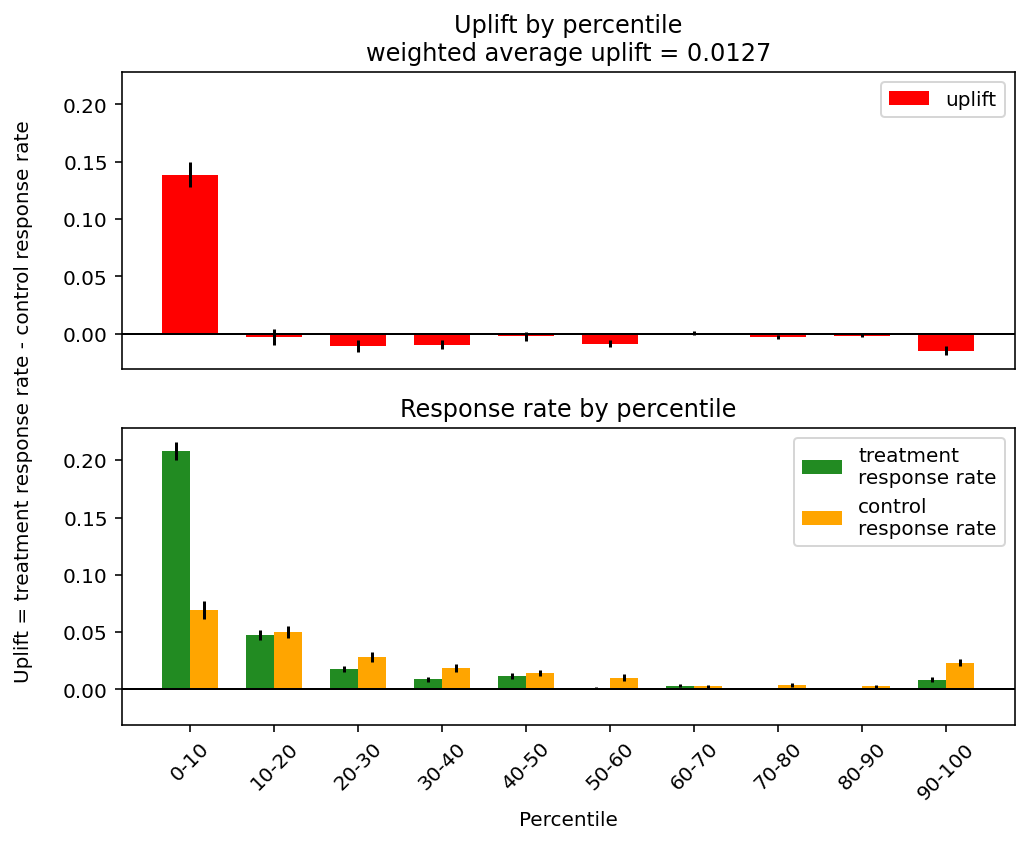

In [14]:
plot_uplift_by_percentile(y_true, uplift, treatment, kind="bar")
plt.show()